In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline

In [3]:
# Replace with the path to the logs directory in multi-memory-task
logs_path = '/Users/isabella/multi-memory-task/logs' 

# Replace this with the name of the dataset directories
datasets = ["2023_06_16_09_44_28","2023_06_16_10_09_12","2023_06_16_10_30_57","2023_06_16_10_35_56","2023_06_16_10_44_00"]

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)

Number of trials:  355


In [4]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct',
       'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'last_vis_time', 'long_delay_s', 'long_visible_s'],
      dtype='object')

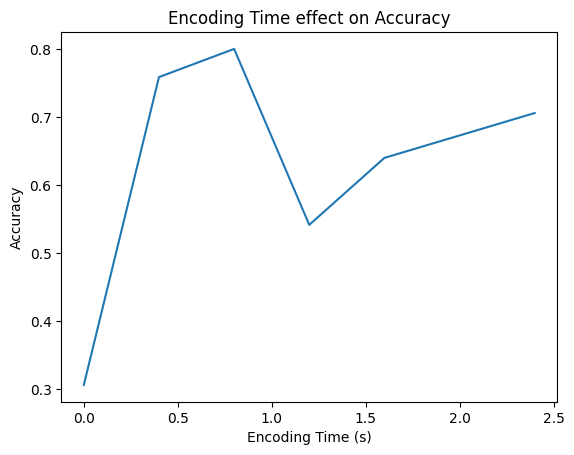

In [5]:
analysis_pipeline.round("visible_s",df)
analysis_pipeline.plot_accuracy("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Accuracy")

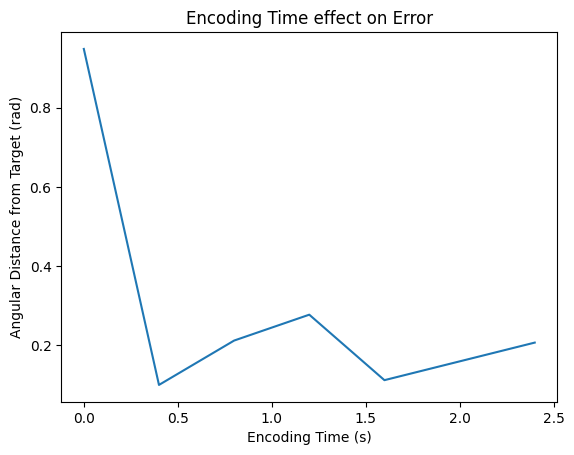

In [6]:
analysis_pipeline.plot_error("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Error")

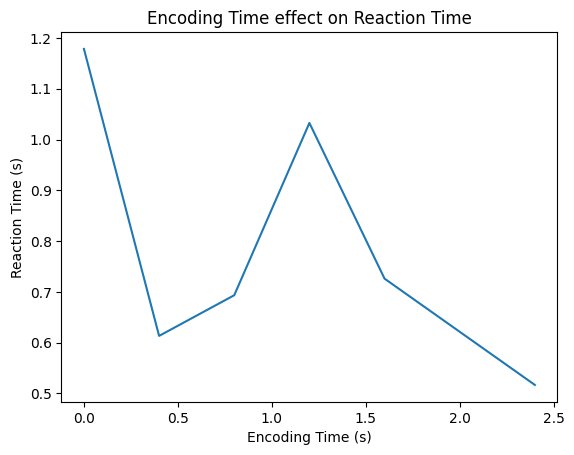

In [7]:
analysis_pipeline.plot_rt("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Reaction Time")

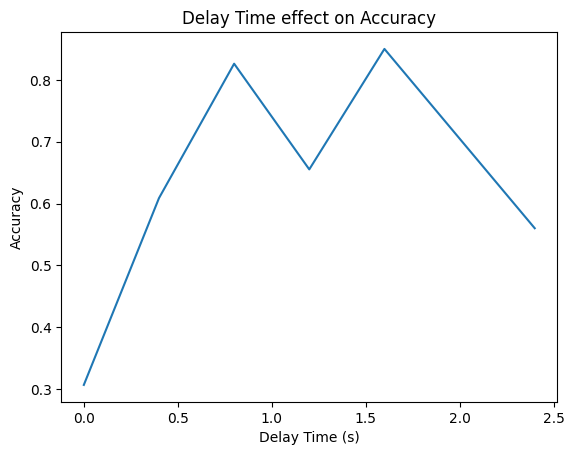

In [8]:
analysis_pipeline.round("delay_s",df)
analysis_pipeline.plot_accuracy("rounded_delay_s", df, "Delay Time (s)", "Delay Time effect on Accuracy")

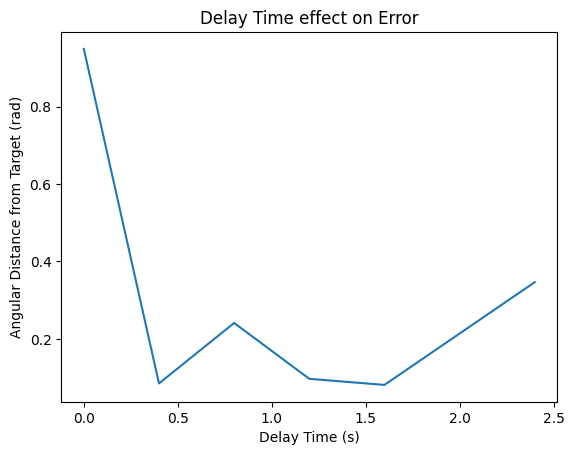

In [9]:
analysis_pipeline.plot_error("rounded_delay_s", df, "Delay Time (s)", "Delay Time effect on Error")

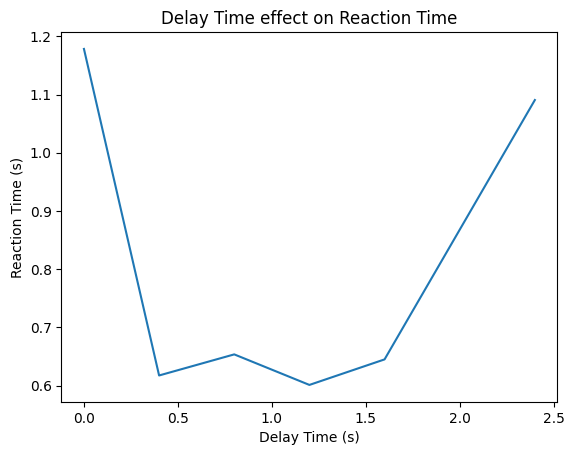

In [10]:
analysis_pipeline.plot_rt("rounded_delay_s", df, "Delay Time (s)", "Delay Time effect on Reaction Time")

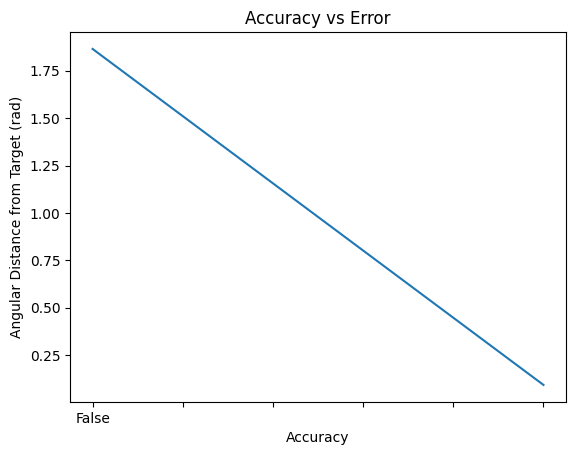

In [11]:
analysis_pipeline.plot_error("correct", df, "Accuracy", "Accuracy vs Error")

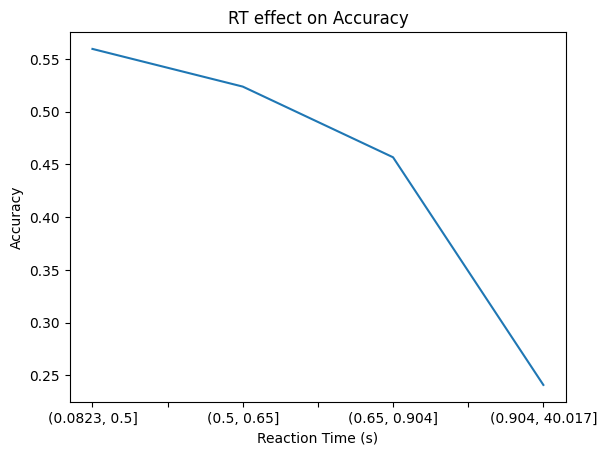

In [12]:
analysis_pipeline.plot_accuracy(pd.qcut(df['reaction_time_s'],4),df,'Reaction Time (s)', 'RT effect on Accuracy')


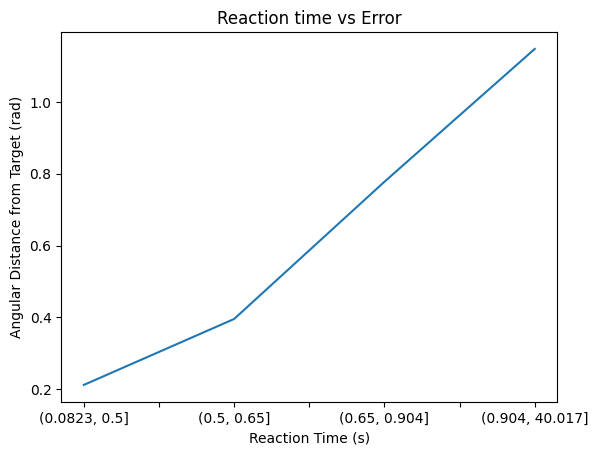

In [13]:
analysis_pipeline.plot_error(pd.qcut(df['reaction_time_s'],4),df,'Reaction Time (s)', 'Reaction time vs Error')

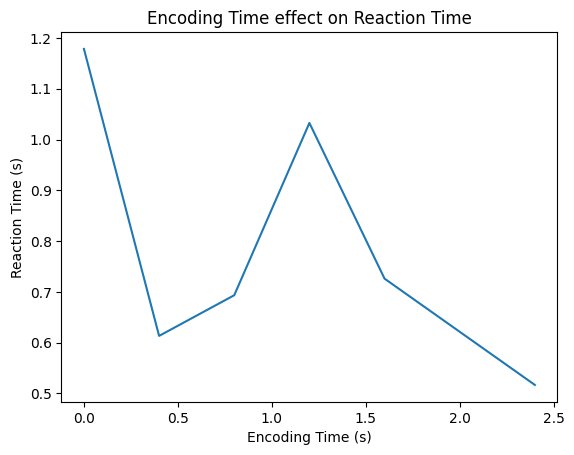

In [14]:
analysis_pipeline.plot_rt("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Reaction Time")

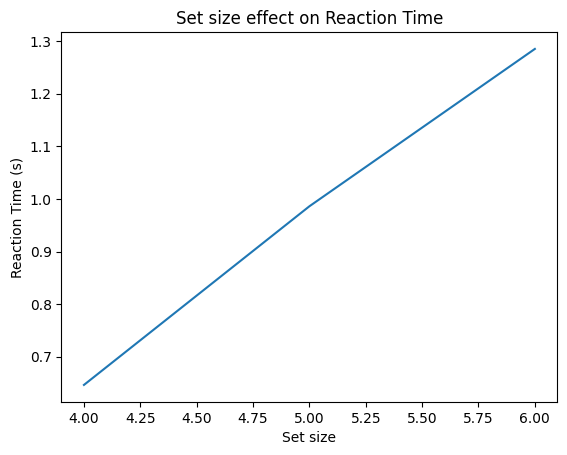

In [15]:
analysis_pipeline.plot_rt("num_object", df, "Set size", "Set size effect on Reaction Time")

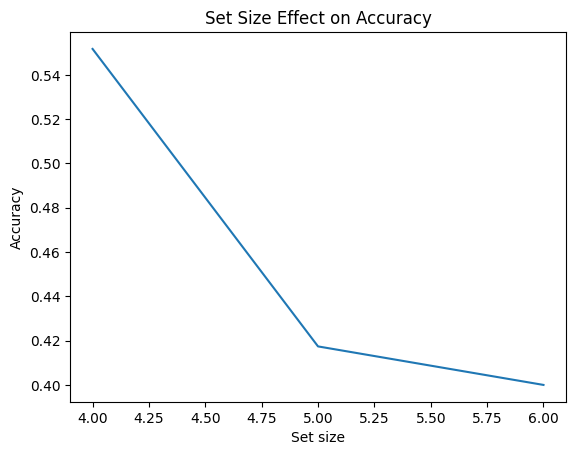

In [16]:
analysis_pipeline.plot_accuracy('num_object',df, 'Set size','Set Size Effect on Accuracy')

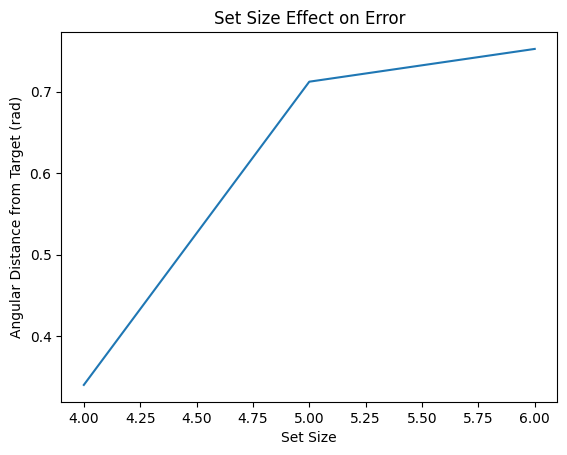

In [17]:
analysis_pipeline.plot_error('num_object', df, 'Set Size', 'Set Size Effect on Error')

In [18]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct',
       'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'last_vis_time', 'long_delay_s', 'long_visible_s', 'rounded_visible_s',
       'precision_difference_0', 'precision_difference_0_abs',
       'reaction_time_s', 'rounded_delay_s'],
      dtype='object')

In [19]:
data = df['reaction_time_steps'].tolist()

In [20]:

best_fit_distribution, best_fit_params = None, None
best_fit_mse = np.inf

if len(data) < 2:
    raise ValueErorr('not enough points')
# Iterate over all supported distributions in scipy.stats
for distribution in dir(stats):
    if isinstance(getattr(stats, distribution), stats.rv_continuous):
        # Fit the distribution to the data
        dist = getattr(stats, distribution)
        params = dist.fit(data)

        # Generate PDF values for the fitted distribution
        pdf = dist.pdf(np.linspace(min(data), max(data), len(data)), *params)

        # Calculate mean squared error (MSE) as a measure of goodness of fit
        mse = np.mean((pdf - np.histogram(data, bins=332, density=True)[0]) ** 2)

        # Keep track of the best fit distribution
        if mse < best_fit_mse:
            best_fit_distribution = distribution
            best_fit_params = params
            best_fit_mse = mse
    print('done')

dist = getattr(stats, best_fit_distribution)
samples = dist.rvs(*best_fit_params, size=10)
print(samples)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:876: RuntimeWarning: divide by zero encountered in divide
  a/(b-1.0),
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distn

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3180: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025.
  warnings.warn(
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3180: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  warnings.warn(
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3180: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0002777777777777778.
  warnings.warn(
/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3180: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.000462962962962963.
  warni

done
done
done
done
done
done
done
done
done
done
done
done
done
done


/Users/isabella/miniconda3/envs/multi-memory-env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:4071: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


/var/folders/5b/tzny4frj0yv66xp5nm6jnpjh0000gp/T/ipykernel_70536/3679791462.py:11: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  params = dist.fit(data)
/var/folders/5b/tzny4frj0yv66xp5nm6jnpjh0000gp/T/ipykernel_70536/3679791462.py:14: DeprecationWarning:         `gilbrat.pdf` is deprecated, use `gibrat.pdf` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  pdf = dist.pdf(np.linspace(min(data), max(data), len(data)), *params)


done
done
done
done
done
done
done
done
done
done
done
done
done


ValueError: Iteration of zero-sized operands is not enabled